In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
from tools import open_file, load_products, dataframe
from datetime import datetime, timedelta
from tools import TDOP

### 0. Load data

In [2]:
products = load_products() #종목정보
raw_daily = open_file('h5py','raw data/daily_futures.h5') #daily futures
raw_density = open_file('tb','raw data/density.hdf5', mode='r') #density table

### 1. Generate TDOPS

In [3]:
fname = f'tdops/tdops_decay_7.h5'
file = open_file('h5py', fname, mode='w', force=True)

In [4]:
%%time
length = len(raw_density.list_nodes('/'))

for cnt, grp in enumerate(raw_density.iter_nodes('/')):
    symbol = grp._v_name
    #if symbol != 'GC':
    #    continue
    for ohlc in raw_daily.values():
        if ohlc.attrs['symbol'] == symbol:
            dateindex = ohlc.value[:,0].astype('M8[s]')
    
    print('\r processing: %s (%s/%s)                             '%(symbol,cnt,length), end='', flush=True)
    pinfo = products[symbol]
    x, columns, values, date = TDOP.get_factors(grp.Density, pinfo)
    dates = []
    prices = []
    tdops = []
    for now in dateindex:
        print(f"\rprocessing: {symbol} at {now} ({cnt}/{length})                        ", end='', flush=True)
        #x, y, date = create_tdop(grp.Density, pinfo, decayfactor=1, now=now, period=2)
        y = TDOP.create_tdop(columns, values, date, now=now, period=None, decayfactor=7)
        dates.append(now)
        tdops.append(y)
    dates = np.array(dates).astype('int64')
    prices = np.array(x)
    tdops = np.array(tdops)
    
    group = file.create_group(symbol)
    group.create_dataset("dates", dates.shape, data=dates)
    group.create_dataset("prices", prices.shape, data=prices)
    group.create_dataset("tdop", tdops.shape, data=tdops, compression="gzip")

processing: ZW at 2014-12-31T00:00:00 (48/49)                          Wall time: 1h 6min 33s


In [5]:
file.close()

### Verification

In [6]:
file = open_file('h5py', fname, mode='r')

In [7]:
a=file['GC/tdop'].value

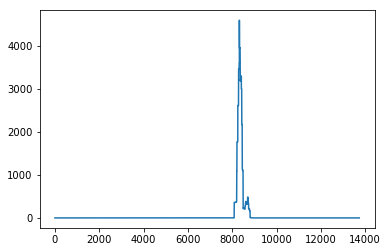

In [8]:
plt.plot(a[-1000])
#plt.axes().set_xlim([1000,4000])

In [42]:
file.close()

In [55]:
for gp in raw_density.iter_nodes('/'):
    print(gp._v_name)

AD
BP
CC
CD
CL
CT
DX
ED
FBTP
FDAX
FESX
FGBL
FGBM
FGBS
GC
HG
HO
JY
KC
LC
LCO
LGO
LH
NE
NG
NKD
OJ
PA
PL
SB
SF
SI
URO
WTCL
ZB
ZC
ZF
ZL
ZM
ZN
ZO
ZR
ZS
ZT
ZW
